In [32]:
from math import exp, sqrt
import math
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sns.set()

In [10]:
def price (T,n,S,sigma,r,K):
    dt = T/n
    u = exp(sigma * sqrt(dt))
    d = 1/u
    p = (exp((r)*dt)-d)/(u-d)
    q = 1-p
    R = exp(r*dt)
    stockTree = np.zeros((n+1, n+1)) 
    stockTree[0,0] = S
    for i in range(1,n+1):
        stockTree[0,i] = stockTree[0, i-1]*u
        for j in range(1,n+1):
            stockTree[j,i] = stockTree[j-1, i-1]*d
    optionTree = np.zeros((n+1,n+1))
    for j in range(n+1):
        optionTree[j, n] = max(0, (stockTree[j, n]-K))
        
   
    for i in range(n-1,-1,-1):
        for j in range(i+1):
            optionTree[j, i] = (p * optionTree[j, i+1] + q * optionTree[j+1, i+1])/R
   
                
    return optionTree[0,0]

In [11]:
print (price(1,10,50,0.2,0.05,50))

5.126704522435974


In [16]:
N=[i for i in range(1,100)]
L=[]
for n in (N):
    L.append(price(1,n,50,0.2,0.05,50))

In [28]:
def bsm_option_value(S0, E, T, R, SIGMA):   
    S0 = float(S0)
    d1 = (math.log(S0/E)+(R+(0.5*SIGMA**2))*T)/(SIGMA*math.sqrt(T))
    d2 = d1-(SIGMA*math.sqrt(T))
    call_value = S0*stats.norm.cdf(d1,0,1) - E*math.exp(-R*T)*stats.norm.cdf(d2,0,1)
    return (call_value)

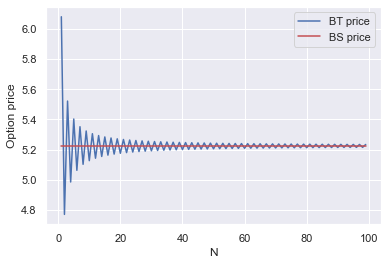

In [33]:
V=bsm_option_value(50, 50, 1, 0.05, 0.2)
L1=[V for i in range (1,100)]
plt.plot(N, L, 'b',label="BT price")
plt.plot(N, L1, 'r',label="BS price")
plt.xlabel("N")
plt.ylabel("Option price")
plt.legend()
plt.show()

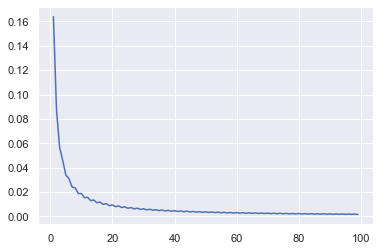

In [37]:
#Difference
L2=[]
for m in N :
    diff = V - price(1,m,50,0.2,0.05,50)
    pct_diff = abs(diff / V)
    L2.append (pct_diff)
plt.plot(N, L2, 'b',label="Error") 
#If you want higher accuracy you can increase the number of tree steps

Text(0.5, 1.0, 'r sensibility')

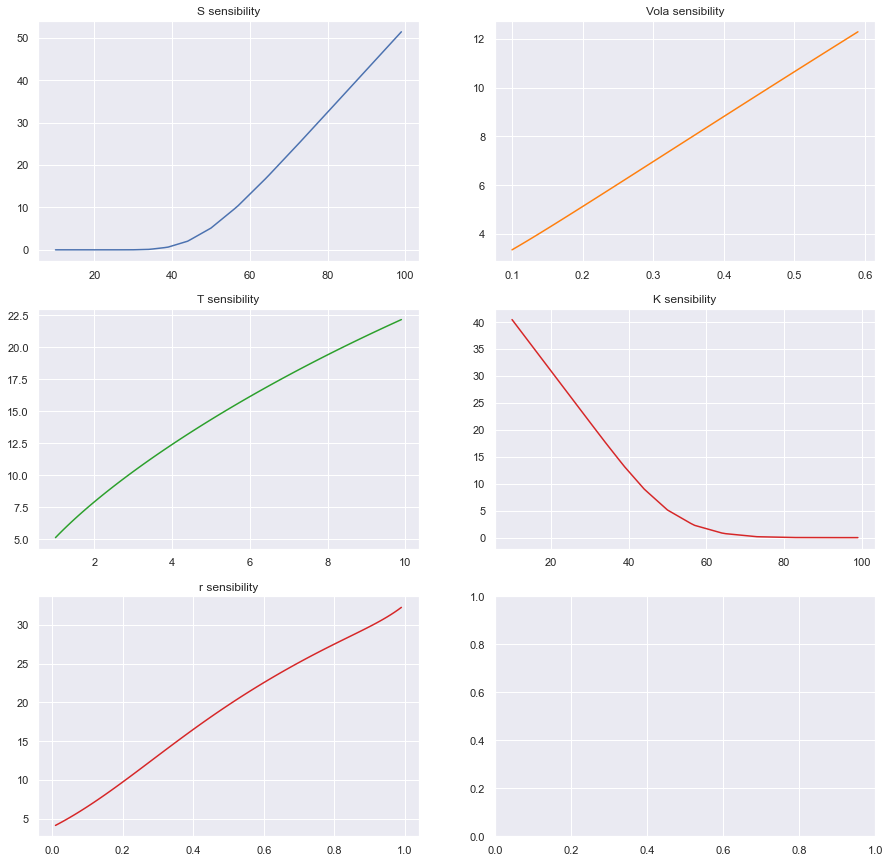

In [50]:
#Sensibility
LS1=[i for i in range (10,100,1) ]
LV1=[V*0.01 for V in range (10,60,1)]
LT1=[T*0.1 for T in range (10,100,1)]
LK1=[K for K in range (10,100,1)]
Lr1=[r*0.01 for r in range (1,100,1)]
LS=[]
LV=[]
LT=[]
LK=[]
Lr=[]
for S in range (10,100,1):
    LS.append(price(1,10,S,0.2,0.05,50))
for V in (LV1):
    LV.append(price(1,10,50,V,0.05,50))
for T in (LT1):
    LT.append(price(T,10,50,0.2,0.05,50))
for K in (LK1):
    LK.append(price(1,10,50,0.2,0.05,K))
for r in (Lr1):
    Lr.append(price(1,10,50,0.2,r,50))
fig, axs = plt.subplots(3, 2 ,figsize=(15,15))
axs[0, 0].plot(LS1, LS)
axs[0, 0].set_title('S sensibility')
axs[0, 1].plot(LV1,LV, 'tab:orange')
axs[0, 1].set_title('Vola sensibility')
axs[1, 0].plot(LT1,LT, 'tab:green')
axs[1, 0].set_title('T sensibility')
axs[1, 1].plot(LK1,LK, 'tab:red')
axs[1, 1].set_title('K sensibility')
axs[2, 0].plot(Lr1,Lr, 'tab:red')
axs[2, 0].set_title('r sensibility')

In [45]:
#parity put call
def put (T,n,S,sigma,r,K):
    C=price(T,n,S,sigma,r,K)
    p=C-S+K*exp(-r*T)
    return (p)

In [46]:
print (put(1,10,50,0.2,0.05,50))

2.688175747471675


In [100]:
#American options
#cp=1 or -1 for call and put
def Amprices(T,n,S,sigma,r,K,cp):
    dt = T/n
    u = exp(sigma * sqrt(dt))
    d = 1/u
    p = (exp((r)*dt)-d)/(u-d)
    q = 1-p
    R = exp(r*dt)
    stockTree = np.zeros((n+1, n+1)) 
    stockTree[0,0] = S
    for i in range(1,n+1):
        stockTree[0,i] = stockTree[0, i-1]*u
        for j in range(1,n+1):
            stockTree[j,i] = stockTree[j-1, i-1]*d
    optionTree = np.zeros((n+1,n+1))
    for j in range(n+1):
        optionTree[j, n] = max(0, cp*(stockTree[j, n]-K))
        
   
    for i in range(n-1,-1,-1):
        for j in range(i+1):
            optionTree[j, i] = max((p * optionTree[j, i+1] + q * optionTree[j+1, i+1])/R,   
                               cp * (stockTree[j, i] - K)) 
   
                
    return optionTree[0,0]

In [101]:
cp=-1
u=1.2
S=50
K=52
T=0.5
r=0.05
N=1
dt=T/N
sigma=math.log(u)/sqrt(dt)
print (Amprices(T,N,S,sigma,r,K,cp))
print (put(T,N,S,sigma,r,K))

4.801389752230884
4.801389752230882
